# Import Libraries & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Datasets

In [12]:
df = pd.read_csv("C:\\Users\\deade\\OneDrive\\Desktop\\Haldiram-Project\\haldiram_sales_data.csv")

In [3]:
df.head()

,Order_ID,Product_Name,Category,Quantity,Price_per_Unit,Total_Price,Order_Date,Store_Location,Stock_Available,Customer_Rating
0,1,Navratan Mix,Snacks,1,25,25,2025-02-15,Kolkata,250,4.3
1,2,Bhel Puri,Snacks,3,35,105,2024-07-25,Lucknow,432,NaN
2,3,Navratan Mix,Snacks,7,25,175,2024-06-21,Chennai,517,3.9
3,4,Bhel Puri,Snacks,14,35,490,2025-03-26,Chennai,459,4.5
4,5,Aloo Bhujia,Snacks,6,20,120,2024-09-26,Pune,348,3.0


# Basic Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         10000 non-null  int64  
 1   Product_Name     10000 non-null  object 
 2   Category         10000 non-null  object 
 3   Quantity         10000 non-null  int64  
 4   Price_per_Unit   10000 non-null  int64  
 5   Total_Price      10000 non-null  int64  
 6   Order_Date       10000 non-null  object 
 7   Store_Location   10000 non-null  object 
 8   Stock_Available  10000 non-null  int64  
 9   Customer_Rating  9513 non-null   float64
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [5]:
df.describe()

,Order_ID,Quantity,Price_per_Unit,Total_Price,Stock_Available,Customer_Rating
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,9513.000000
mean,5000.50000,10.50910,55.379000,580.453500,496.752500,3.755009
std,2886.89568,5.75467,40.568472,577.807821,290.496452,0.722394
min,1.00000,1.00000,10.000000,10.000000,0.000000,2.500000
25%,2500.75000,5.00000,25.000000,175.000000,246.000000,3.100000
50%,5000.50000,10.00000,40.000000,385.000000,493.000000,3.800000
75%,7500.25000,16.00000,80.000000,760.000000,751.000000,4.400000
max,10000.00000,20.00000,150.000000,3000.000000,1000.000000,5.000000


In [6]:
df.shape

(10000, 10)

# Handle Missing Values

In [7]:
df.isnull().sum()

Order_ID             0
Product_Name         0
Category             0
Quantity             0
Price_per_Unit       0
Total_Price          0
Order_Date           0
Store_Location       0
Stock_Available      0
Customer_Rating    487
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

Order_ID           0
Product_Name       0
Category           0
Quantity           0
Price_per_Unit     0
Total_Price        0
Order_Date         0
Store_Location     0
Stock_Available    0
Customer_Rating    0
dtype: int64

In [19]:
df.head()

,Order_ID,Product_Name,Category,Quantity,Price_per_Unit,Total_Price,Order_Date,Store_Location,Stock_Available,Customer_Rating
0,1,Navratan Mix,Snacks,1,25,25,2025-02-15,Kolkata,250,4.300000
1,2,Bhel Puri,Snacks,3,35,105,2024-07-25,Lucknow,432,3.755009
2,3,Navratan Mix,Snacks,7,25,175,2024-06-21,Chennai,517,3.900000
3,4,Bhel Puri,Snacks,14,35,490,2025-03-26,Chennai,459,4.500000
4,5,Aloo Bhujia,Snacks,6,20,120,2024-09-26,Pune,348,3.000000


# Data Type Conversion

In [20]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [21]:
df.head()

,Order_ID,Product_Name,Category,Quantity,Price_per_Unit,Total_Price,Order_Date,Store_Location,Stock_Available,Customer_Rating
0,1,Navratan Mix,Snacks,1,25,25,2025-02-15,Kolkata,250,4.300000
1,2,Bhel Puri,Snacks,3,35,105,2024-07-25,Lucknow,432,3.755009
2,3,Navratan Mix,Snacks,7,25,175,2024-06-21,Chennai,517,3.900000
3,4,Bhel Puri,Snacks,14,35,490,2025-03-26,Chennai,459,4.500000
4,5,Aloo Bhujia,Snacks,6,20,120,2024-09-26,Pune,348,3.000000


# Clean Categorical Columns

In [22]:
df['Store_Location'] = df['Store_Location'].str.strip().str.title()
df['Category'] = df['Category'].str.strip().str.title()

# Total Price

In [24]:
df['Total_Price'] = df['Quantity'] * df['Price_per_Unit']

#  Revenue Category (Low / Medium / High)

In [26]:
def revenue_category(x):
    if x < 500:
        return 'Low'
    elif x < 1000:
        return 'Medium'
    else:
        return 'High'

df['Revenue_Category'] = df['Total_Price'].apply(revenue_category)

# Month Column

In [28]:
df['Order_Month'] = df['Order_Date'].dt.month_name()

# Rating Category

In [30]:
def rate_group(rating):
    if rating < 3.0:
        return 'Bad'
    elif rating < 4.0:
        return 'Average'
    else:
        return 'Good'

df['Rating_Category'] = df['Customer_Rating'].apply(rate_group)

# Save Cleaned File for SQL

In [41]:
df.to_csv("C:\\Users\\deade\\OneDrive\\Desktop\\Haldiram-Project\\haldiram-analysis", index=False)

# Most Sold Products

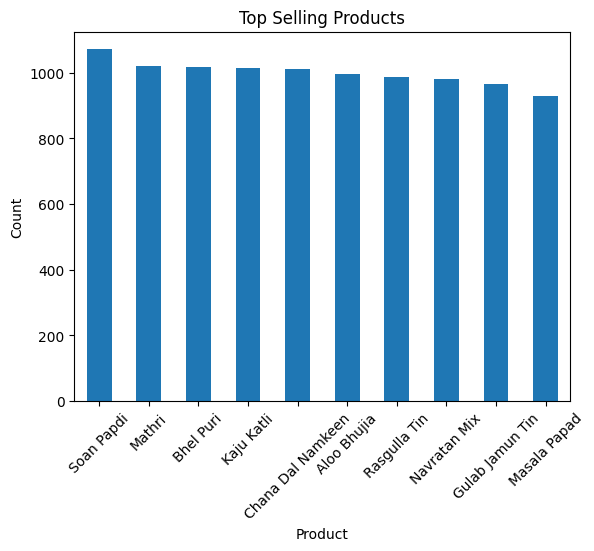

In [42]:
df['Product_Name'].value_counts().head(10).plot(kind='bar')
plt.title("Top Selling Products")
plt.xlabel("Product")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#  Revenue by City

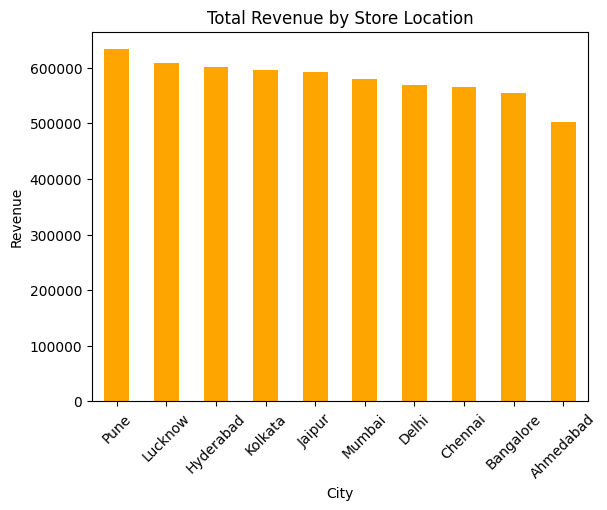

In [38]:
city_revenue = df.groupby('Store_Location')['Total_Price'].sum().sort_values(ascending=False)
city_revenue.plot(kind='bar', color='orange')
plt.title("Total Revenue by Store Location")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

# Monthly Sales Trend

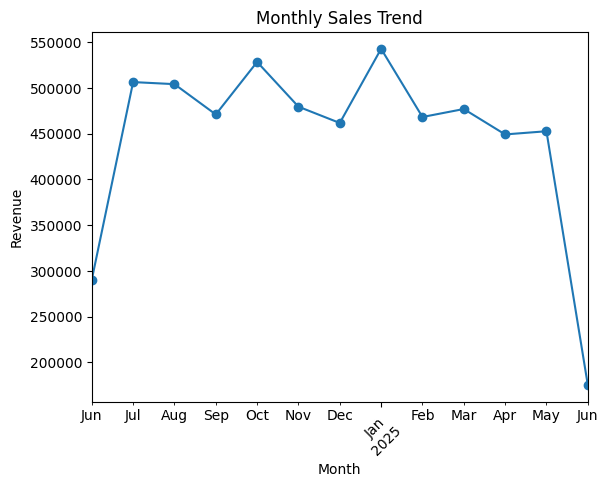

In [39]:
df['Month'] = df['Order_Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total_Price'].sum()
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()


 # Ratings Distribution

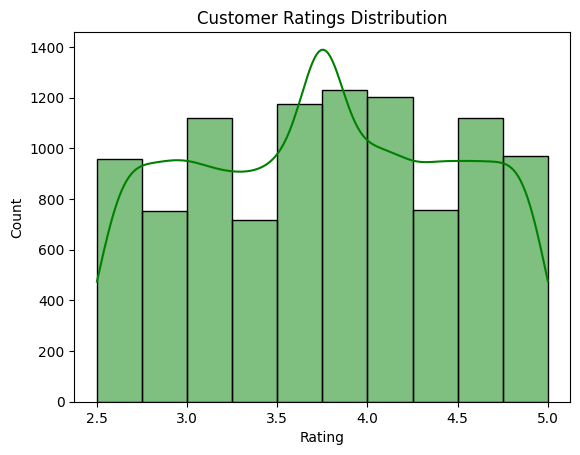

In [40]:
sns.histplot(df['Customer_Rating'], bins=10, kde=True, color='green')
plt.title("Customer Ratings Distribution")
plt.xlabel("Rating")
plt.show()
